In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import style
import seaborn as sns
%matplotlib inline
sns.set()
# Scipy Optimization Algorithm is used to find the optimal parameters
import scipy.optimize as opt
# Scipy is needed to load a MATLAB digit dataset
from scipy.io import loadmat
from sklearn.preprocessing import StandardScaler
from scipy import linalg

In [2]:
data1 = loadmat('ex7data2')
data2 = loadmat('bird_small')

In [3]:
X1 = np.array(pd.DataFrame.from_dict(data1['X']))

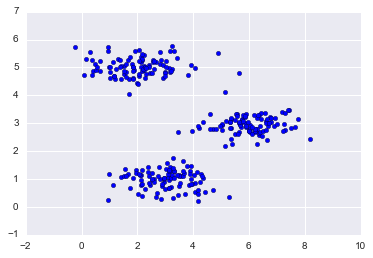

In [4]:
plt.scatter(X1[:,0], X1[:,1])

### Note that function below works with any number of feature so it may be implemented in further tasks

In [5]:
# Set Initial parameters

n1=3 # Number of Centroids
#x = np.array(pd.DataFrame.from_dict(data2['X']))
# Feature number
f1 = len(X1[0,:])

In [6]:
# Function to initialize random centroids
def init_centr(x, n):
    p = np.random.randint(0,x.shape[0], n)
    centroids = x[p,:]
    return centroids

# check the function
centroids = init_centr(X1, n1)
centroids

array([[ 2.1159935 ,  0.7930365 ],
       [ 0.94048944,  5.71556802],
       [ 3.29765181,  5.59205535]])

In [7]:
# Function to initialize a centroid to the each data point
def cluster_assign(x, n, centroids):
    cluster = np.zeros(len(x))
    distances = np.zeros((len(x), n))
    for i in range (n):  # find the distances to each centroid
        distances[:,i] = ((x - np.array([centroids[i,:],]*len(x)))**2).sum(axis = 1)
    label = np.argmin(distances, axis = 1)
    return label
# Return the 1-D array og labels for each data point

In [8]:
# function to find new cluster
def new_cluster(x, label, n):
    f = len(x[0,:])
    new_centroids = np.zeros((n, x.shape[1]))
    x = np.column_stack((x, label))
    
    for i in range(n):
        A = x[np.array(x[:,f]==i)][:, :-1]
        l = len(A)
        new_centroids[i,:] = A.sum(axis = 0) / l
        
        #distortion calculation
        
        
    return new_centroids

In [9]:
# Function which randomly assign innitial centers,  assign clusters and find new cluster k times
def k_mean(x, n, k):
    centroids = init_centr(x, n)
    for i in range (k):
        label = cluster_assign(x, n, centroids)
        centroids = new_cluster(x, label,n)
    return label, centroids

In [10]:
# Function repeat random initialization and furthe calculations to find the optimal case with min distortion
def run_k_means(x, n, k, max_iter):  

    fin_label, fin_centroid  = k_mean(X1, n1, k)
    #find distortion
    A = np.array([fin_centroid[int(i),:] for i in fin_label])
    distor = ((x - A)**2).sum()
    for i in range (max_iter):
        label, centroid = k_mean(X1, n1, 10)
        A = np.array([fin_centroid[int(i),:] for i in fin_label])
        d = ((x - A)**2).sum()
        if d < distor:
            distor = d
            fin_centroid = centroid
            fin_label = label

    return fin_label, fin_centroid

In [11]:
#label, centroid = k_mean(X1, n1, 2)
label, centroid = run_k_means(X1, n1, 10, 10)

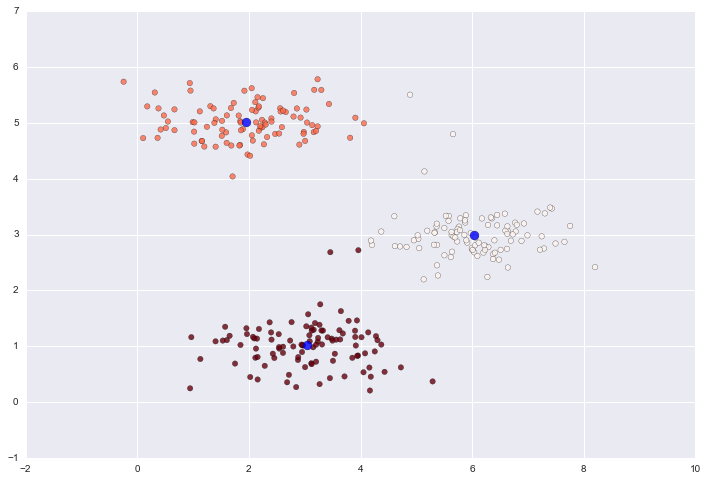

In [12]:
x = np.column_stack((X1, label))
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x[:,0], x[:,1], s=30, c=x[:,2], cmap='Reds', alpha = 0.8)
ax.scatter(centroid[:,0], centroid[:,1], s=80, cmap='Blue', alpha=0.8)  # Show the final centroid points

## Image compression with K-means

In [13]:
# Convert data to the numpy matrix
X2 = np.array(np.array(data2['A']))
X2.shape

(128, 128, 3)

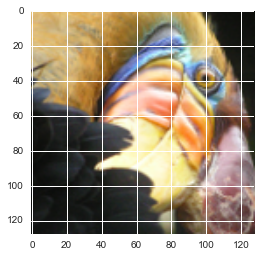

In [14]:
plt.imshow(X2)

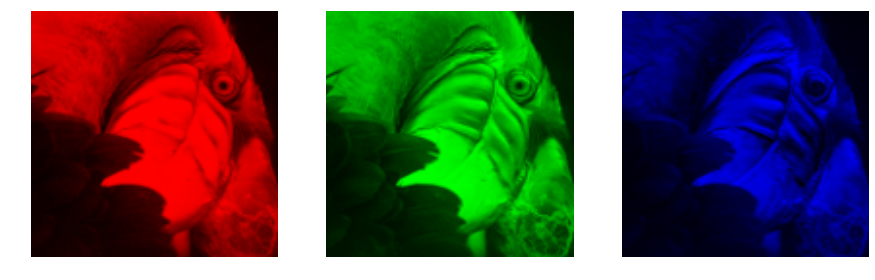

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i, ax in zip(range(3), axes):
    R = np.zeros(X2.shape, dtype="uint8")
    R[:,:,i] = X2[:,:,i]
    ax.imshow(R)
    ax.set_axis_off()

In [16]:
# Finally reshape a matrix
X2 = np.reshape(X2, (X2.shape[0] * X2.shape[1], X2.shape[2]))

In [17]:
n2 = 16
label, centroid = k_mean(X2, n2, 10)

In [18]:
#new_X1 = np.array([centroid[int(i),:] for i in label])
#print(new_X1.shape)
new_X2 = centroid[label.astype(int),:]
new_X2 = new_X2.reshape(128,128,3)

In [19]:
# Note that dtype 'uint8' which range is 0 to 255 
# all integer dtypes have pixel intensities that can span the entire data type range.
new_X2 = np.array(new_X2, dtype='uint8')

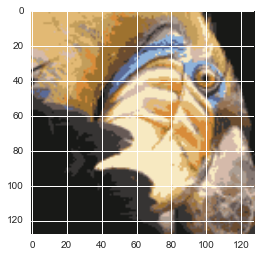

In [20]:
plt.imshow(new_X2)

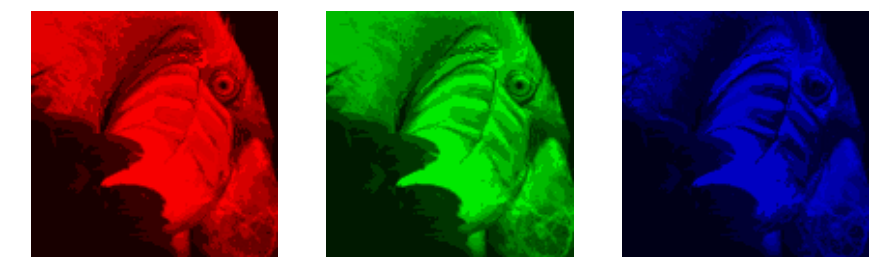

In [21]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for i, ax in zip(range(3), axes):
    R = np.zeros(new_X2.shape, dtype="uint8")
    R[:,:,i] = new_X2[:,:,i]
    ax.imshow(R)
    ax.set_axis_off()

## Principal Component Analysis

In [22]:
data3 = loadmat('ex7data1')

In [23]:
X3 = np.array(pd.DataFrame.from_dict(data3['X']))

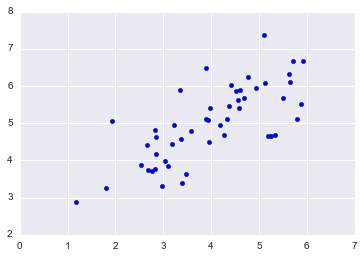

In [24]:
plt.scatter(X3[:,0], X3[:,1])

In [25]:
# Standardizing the data.
scaler = StandardScaler()
scaler.fit(X3)
X3 = scaler.transform(X3)
#X3 = (X3 - X3.mean())/X3.std()

In [26]:
U, S, V = linalg.svd(X3.T)
print(U)
print(S)

[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]]
[ 9.3153915   3.63641048]


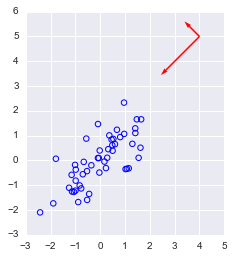

In [27]:
plt.scatter(X3[:,0], X3[:,1], s=30, edgecolors='b',facecolors='None', linewidth=1);
# setting aspect ratio to 'equal' in order to show orthogonality of principal components in the plot
plt.gca().set_aspect('equal')
plt.quiver(scaler.mean_[0], scaler.mean_[1], U[0,0], U[0,1], scale=S[1], color='r')
plt.quiver(scaler.mean_[0], scaler.mean_[1], U[1,0], U[1,1], scale=S[0], color='r');

In [28]:
U_reduc = U[0]
z = np.dot(X3, U_reduc)

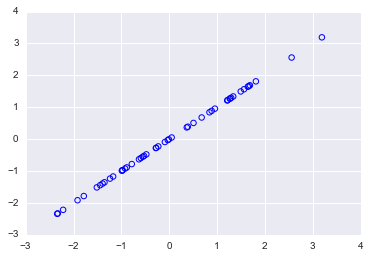

In [29]:
plt.scatter(z, z, s=30, edgecolors='b',facecolors='None', linewidth=1);

In [30]:
print(S[0]/S.sum(), 'variance retained')

0.719235170077 variance retained


## Dimensionality Reduction with PCA. Face Image

In [31]:
data4 = loadmat('ex7faces')
X4 = np.array(pd.DataFrame.from_dict(data4['X']))

In [32]:
X4.shape

(5000, 1024)

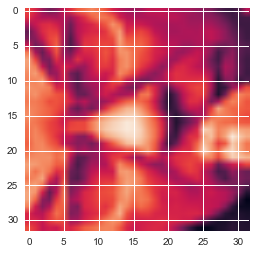

In [33]:
face = X4[8,:].reshape(32,32)
plt.imshow(face)

In [34]:
# Normalize features
X4_norm = (X4 - X4.mean())/X4.std()
U, S, V = linalg.svd(X4_norm.T)

In [35]:
U[:,:100].shape

(1024, 100)

In [36]:
U_reduc = U[:,:100]
z = np.dot(X4, U_reduc)

In [37]:
z.shape

(5000, 100)

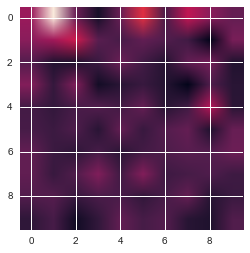

In [38]:
face = z[8,:].reshape(10,10)
plt.imshow(face)

In [39]:
# Recover Image
X_rec =np.dot(z, U_reduc.T)

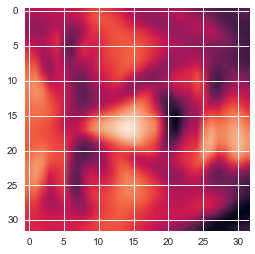

In [40]:
face = X_rec[8,:].reshape(32,32)
plt.imshow(face)